#  Notebook Overview

Since the beginning of 2020, the biking industry had an influx of new customers due to the restriction of public transportation caused by the pandemic. There was a shortage in the supply of bicycles as millions of people saw the benefits of having a bike as their main way of transport. Such benefits includes biking as a form of exercise which helps alleviate the strain caused by having a sedentary lifestyle and it also helps reduce carbon emmision which could contribute to climate change. But as I got deeper to understanding the industry, I noticed that biking as the main form of transportation is not prevalent in my country, the Philippines. What could have caused this discrepency between countries and which countries are more suitable for a bicycle rental business, let us find out!

# Objectives:
* Find out why biking isn't as prevalent in some countries.
* Provide the countries and cities most suitable for opening a bicycle rental business.
* Create a model that would predict whether a certain location would be ideal for a bicycle rental business.

# Importing Libraries and Loading Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

df = pd.read_csv("../input/rental-bike-sharing/day.csv")
df_weather = pd.read_csv("../input/daily-temperature-of-major-cities/city_temperature.csv",low_memory = False)
df_population = pd.read_csv("../input/undata-country-profiles/country_profile_variables.csv")
df_city_population = pd.read_csv("../input/world-city/worldcities.csv")

# Preparing Data

**Bicycle Dataset**

In [2]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
df.shape

(731, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**MetaData**

* instant: record index
* dteday : date
* season : season (1:winter, 2:spring, 3:summer, 4:fall)
* yr : year (0: 2011, 1:2012)
* mnth : month ( 1 to 12)
* hr : hour (0 to 23)
* holiday : weather day is holiday or not
* weekday : day of the week
* workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
* weathersit :
* 1: Clear, Few clouds, Partly cloudy, Partly cloudy
* 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
* 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
* 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
* atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
* hum: Normalized humidity. The values are divided to 100 (max)
* windspeed: Normalized wind speed. The values are divided to 67 (max)
* casual: count of casual users
* registered: count of registered users
* cnt: count of total rental bikes including both casual and registered

# Data Preparation - Bicycle Data

Based on the metadata of the current dataset, the column 'instant' provides the index of each instances. We could remove this column since pandas already provided as with a default row index.

In [6]:
# remove unwanted columns
df.drop('instant',axis = 1,inplace = True)

**Check for Null Values**

In [7]:
df.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There seems to be no Null Values in the bicycle dataset.

# Feature Engineering - Bicycle Dataset

In [8]:
#set dates to datetime
df['dteday'] = pd.to_datetime(df['dteday'])

# put quarters based on dteday
df['quarter'] = df['dteday'].dt.quarter

The temperature, humidity, and windspeed were all adjusted/scaled based on a specific parameter. We have to convert it back to its original state for data exploration purposes.

In [9]:
# Reverting back to original state
df['temp'] = df['temp'].agg(lambda x: x*41)
df['atemp'] = df['atemp'].agg(lambda x: x*50)
df['hum'] = df['hum'].agg(lambda x: x*100)
df['windspeed'] = df['windspeed'].agg(lambda x: x*67)

**Check for Outliers**

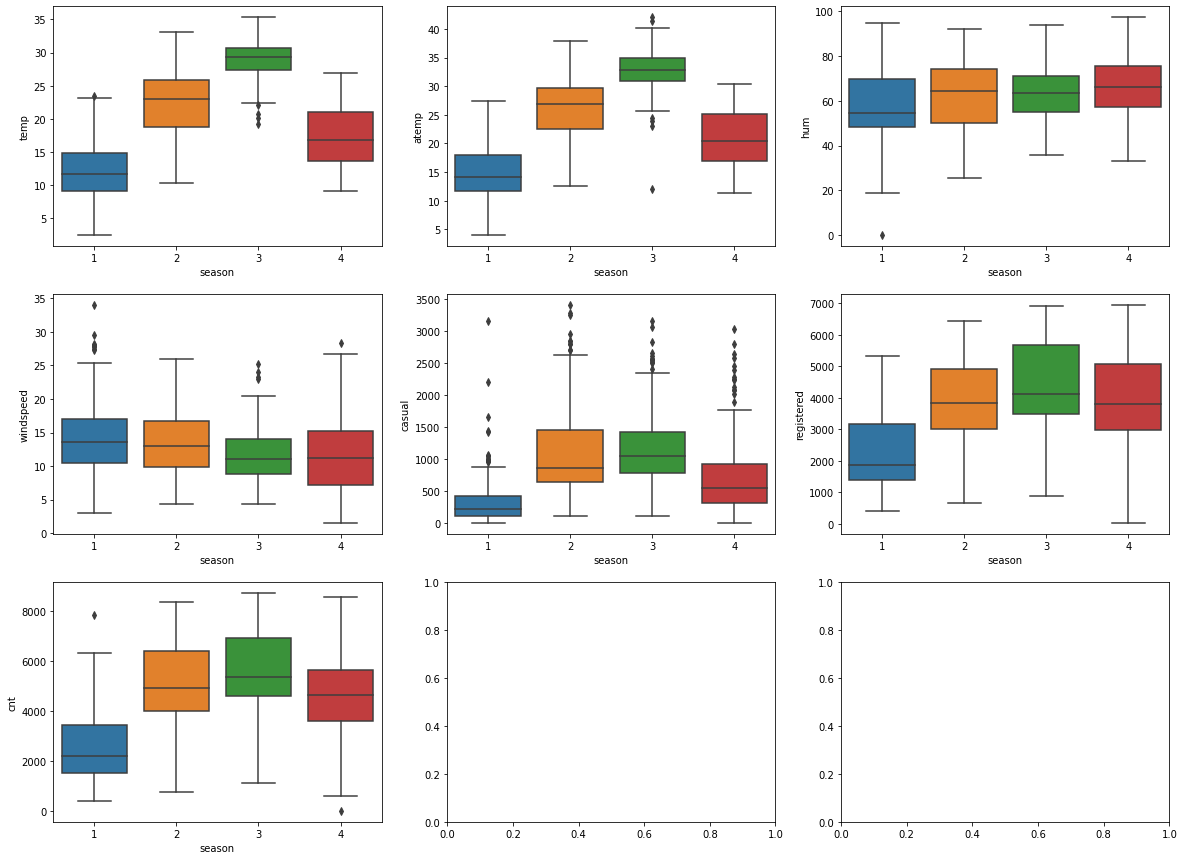

In [10]:
# Checking for outliers
test = ['temp', 'atemp', 'hum', 'windspeed','casual', 'registered', 'cnt']
fig,ax1 = plt.subplots(3,3,figsize = (20,15))
for i, number in enumerate(test):
    sns.boxplot(x = 'season',y = number, ax=ax1[i//3, i%3],data=df)

The data points appear reasonable. In a natural setting, it's quite common to encounter outliers because nature is inherently variable, and there isn't always a strict baseline for each season. Given this context, there's no intention to remove any outliers from the dataset. In fact, retaining these outliers might provide valuable insights into the overall characteristics of the data.

# Weather Dataset

In [11]:
df_weather.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [12]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 177.4+ MB


**Reverting Column to Original State**

Just like the bicycle dataset, the average temperature in the weather dataset was scaled. So in exploration purposes, we would revert it back to its original state.

In [13]:
# convert fahrenheit to celcius
df_weather['AvgTemperature'] = (df_weather['AvgTemperature'] - 32) * 0.5556

**Adding Columns**

The Bicycle dataset includes a 'season' feature that's why it would be helpful if we could add a similar feature in the weather dataset to find an association between the two datasets.

In [14]:
#combine month day year to create datetime
df_weather['Date'] = pd.to_datetime(df_weather[['Year','Month']].assign(DAY=1))

#put quarter based from newly created 'Date' Column
df_weather['Quarter'] = df_weather['Date'].dt.quarter

**Checking Outliers**

<AxesSubplot:xlabel='AvgTemperature', ylabel='Region'>

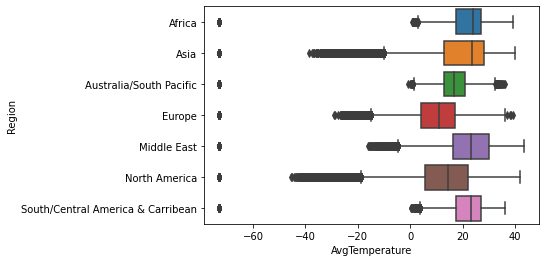

In [15]:
#removing outliers
sns.boxplot(x = 'AvgTemperature',y = 'Region',data = df_weather)

We can notice that for all regions there are temperature well below -60 degrees. This seems a bit odd since all of the regions have one particular value as its last data point. This could be the set baseline of the dataset for this particular two variable association that's why it is better to remove this particular value to have a better representation of the temperature data.

In [16]:
#we can see temperature less than -60, remove less than - 60
filt = df_weather[df_weather['AvgTemperature'] < -60]
df_weather.drop(filt.index, inplace = True)
print(f"The outliers from the df_weather dataset is {filt.shape[0]} rows")

The outliers from the df_weather dataset is 79672 rows


we can't remove more data because the result of the analysis won't be representing the true analysis in terms of temperature.

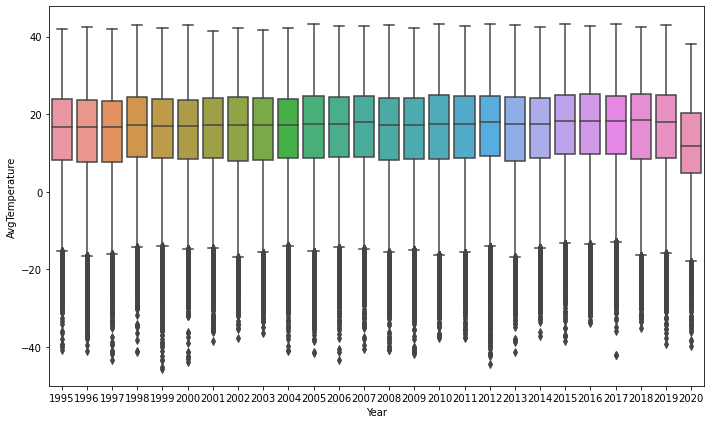

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data = df_weather, x = 'Year', y = 'AvgTemperature')
plt.tight_layout()

The temperature for every year since 1995 until 2019 seems even and the same but there may be a major decline during 2020. This may be caused by the pandemic where due to lockdown, some sensors may have stopped working or couldn't be fixed just in time. Because of this, I will remove the 2020 data points.

In [18]:
df_weather.shape

(2826655, 10)

In [19]:
df_weather = df_weather[df_weather['Date'] < '2020']

In [20]:
df_weather.shape

(2787913, 10)

**Group City and Country to create new Dataset**

Let us create a new dataset called df_city where it would contain the quarterly temperature of each countries and cities. We would be using the median temperature instead of the mean in order to have a better representation of the temperature since the mean is susceptible to outliers.

In [21]:
#city dataset seperate it from weather data set
df_city = pd.DataFrame(df_weather.groupby(['City','Country'])['AvgTemperature'].median())
df_city.rename(columns = {'AvgTemperature':'CityMedTemperature'}, inplace = True)

Another thing we could add is to get the quarterly temperature and create a subsequent column for it in order to associate the weather from the df_city to the seasonal weather from the bicycle dataset.

In [22]:
# set each quarter of the city and country to a variable 
firstq_city = df_weather.groupby('Quarter').get_group(1).groupby(['City','Country'])['AvgTemperature'].median()
secondq_city = df_weather.groupby('Quarter').get_group(2).groupby(['City','Country'])['AvgTemperature'].median()
thirdq_city = df_weather.groupby('Quarter').get_group(3).groupby(['City','Country'])['AvgTemperature'].median()
fourthq_city = df_weather.groupby('Quarter').get_group(4).groupby(['City','Country'])['AvgTemperature'].median()

# add those to newly made df_city
df_city['firstq_city'] = firstq_city
df_city['secondq_city'] = secondq_city
df_city['thirdq_city'] = thirdq_city
df_city['fourthq_city'] = fourthq_city
df_city.sort_values('Country',inplace = True)
df_city

,,CityMedTemperature,firstq_city,secondq_city,thirdq_city,fourthq_city
City,Country,,,,,
Tirana,Albania,16.11240,9.27852,18.89040,24.55752,12.72324
Algiers,Algeria,17.61252,11.72316,19.00152,25.44648,15.27900
Buenos Aires,Argentina,17.33472,22.89072,13.83444,11.88984,19.83492
Perth,Australia,17.83476,23.89080,16.02906,13.38996,19.66824
Melbourne,Australia,18.61260,22.66848,16.16796,14.16780,20.33496
...,...,...,...,...,...,...
Tashkent,Uzbekistan,16.69578,5.88936,22.66848,27.16884,8.66736
Caracas,Venezuela,27.33552,26.05764,27.50220,28.16892,27.39108
Hanoi,Vietnam,25.44648,18.83484,27.64110,28.61340,22.50180


# Population Dataset

Next up is the Population dataset where we would be getting data in order to find features that would be helpful in predicting suitable cities and countries for a bicycle rental business.

In [23]:
df_city_population.head()

,city_name,latitude,longitude,country,population
0,Tokyo,35.6897,139.6922,Japan,37977000.0
1,Jakarta,-6.2146,106.8451,Indonesia,34540000.0
2,Delhi,28.6600,77.2300,India,29617000.0
3,Mumbai,18.9667,72.8333,India,23355000.0
4,Manila,14.6000,120.9833,Philippines,23088000.0


In [24]:
df_city_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41001 entries, 0 to 41000
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city_name   41001 non-null  object 
 1   latitude    41001 non-null  float64
 2   longitude   41001 non-null  float64
 3   country     41001 non-null  object 
 4   population  40263 non-null  float64
dtypes: float64(3), object(2)
memory usage: 1.6+ MB


**Data Preprocessing - Population Dataset**

Let us rename the needed features to a title case since that is what we've used in the previous datasets.

In [25]:
# rename city column
df_city_population.rename(columns = {'city_name ':'City','country':'Country'}, inplace = True)

# only get needed columns in df_city_population
df_city_population = df_city_population[['City','population']]

After doing that, let us now include the features City and population to the df_city dataset.

In [26]:
#join df_city_population and df_city
df_city = df_city.reset_index().set_index('City').join(df_city_population.set_index('City'))

In [27]:
df_city.head()

,Country,CityMedTemperature,firstq_city,secondq_city,thirdq_city,fourthq_city,population
City,,,,,,,
Abidjan,Ivory Coast,27.00216,27.94668,27.55776,25.11312,27.27996,4980000.0
Abilene,US,19.27932,10.27860,23.22408,27.66888,13.50108,123420.0
Abilene,US,19.27932,10.27860,23.22408,27.66888,13.50108,6390.0
Abu Dhabi,United Arab Emirates,29.28012,20.61276,31.94700,35.00280,25.27980,1000000.0
Addis Ababa,Ethiopia,16.94580,17.83476,18.33480,15.94572,16.61244,3041002.0


# GDP per Capita Dataset

This is the final dataset that we would be including in our analyzation. The GDP of each country is very helpful to quantify the economy of each countries which could serve as a very good indicator for our model.

In [28]:
#get number of columns
len(df_population.columns)

50

This dataset has plenty of columns so I refrained from displaying it, but rather I'd just get the needed columns from this dataset.

In [29]:
#just get useful columns from population data set
df_population = pd.DataFrame([df_population['country'],df_population['GDP per capita (current US$)']]).T
df_population.rename(columns = {'GDP per capita (current US$)':'GDP_capita'}, inplace = True)

In [30]:
df_population.head()

,country,GDP_capita
0,Afghanistan,623.2
1,Albania,3984.2
2,Algeria,4154.1
3,American Samoa,-99.0
4,Andorra,39896.4


There are country's name that differs between the population dataset and GDP dataset. To be able to have a better representation, let us alter the names of the countries so that it could match.

In [31]:
#change the name of United States of America to US
df_population['country'].replace({'United States of America':'US'}, inplace = True)

**Check for Outliers**

As we all know, wealth is generally dispersed between countries that's why it is normal to have outliers in both spectrums.

<AxesSubplot:xlabel='GDP_capita'>

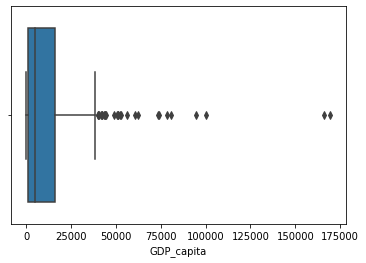

In [32]:
#check outliers
sns.boxplot(x = 'GDP_capita',data = df_population)

After that, let us include the data from the GDP dataset to the df_city dataset. 

In [33]:
# add gdp per capita in df_city and combine df_city and df_population
df_city = df_city.reset_index().set_index('Country').join(df_population.set_index('country'))

In [34]:
#change column name 'index' to 'country' and reset index
df_city.reset_index(inplace = True)
df_city.rename(columns = {'index':'Country'}, inplace = True)

# Exploratory Data Analysis

Let us first find out if there are any correlation between casual/registered users and seasons/months.

<AxesSubplot:xlabel='mnth', ylabel='registered'>

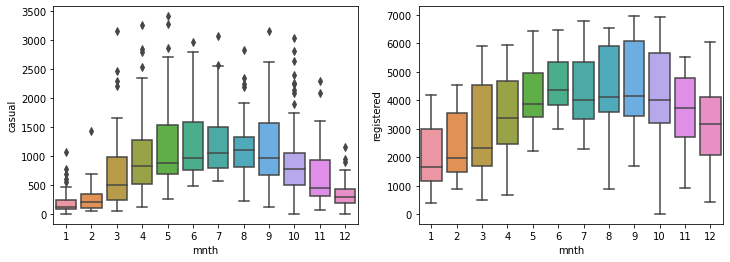

In [35]:
# graph for monthly users
fig, ax =plt.subplots(1,2,figsize=(12, 4))
sns.boxplot(x = 'mnth', y = df['casual'], ax=ax[0], data = df)
sns.boxplot(x = 'mnth', y = df['registered'], ax=ax[1], data = df)

Users of bike rentals show a clear parabolic trend over the months, with the highest usage occurring in September and the lowest in January. To understand this trend better, let's examine how the weather is related to these monthly variations.

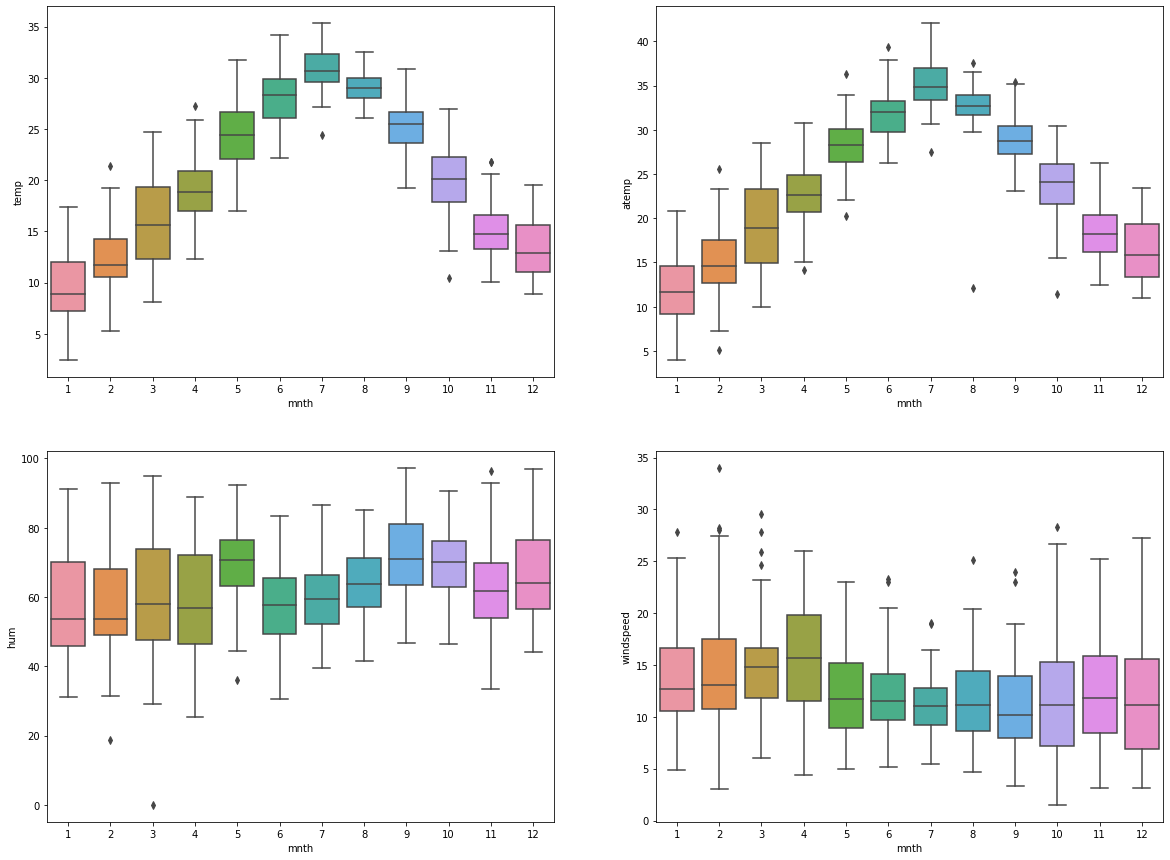

In [36]:
# associate months with weather
weather = [ 'temp', 'atemp', 'hum', 'windspeed']
fig,ax1 = plt.subplots(2,2,figsize = (20,15))
for i, number in enumerate(weather):
    sns.boxplot(x = 'mnth',y = number, ax=ax1[i//2, i%2],data=df)

Similar to the parabolic shape observed in the monthly users' graph, we notice a similar trend when we look at how temperature varies with months. Temperature reaches its peak in July and hits its lowest point in January.

<AxesSubplot:xlabel='season', ylabel='registered'>

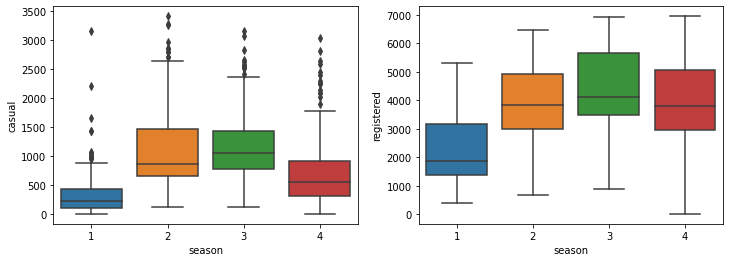

In [37]:
# graph for seasonal users
fig, ax =plt.subplots(1,2,figsize=(12, 4))
sns.boxplot(x = 'season', y = df['casual'], ax=ax[0], data = df)
sns.boxplot(x = 'season', y = df['registered'], ax=ax[1], data = df)

We can observe that both casual and registered bike rental users experience spikes during the summer (orange) and fall (green) seasons. To understand the reasons behind this pattern, let's explore how these seasons are connected to the weather conditions.

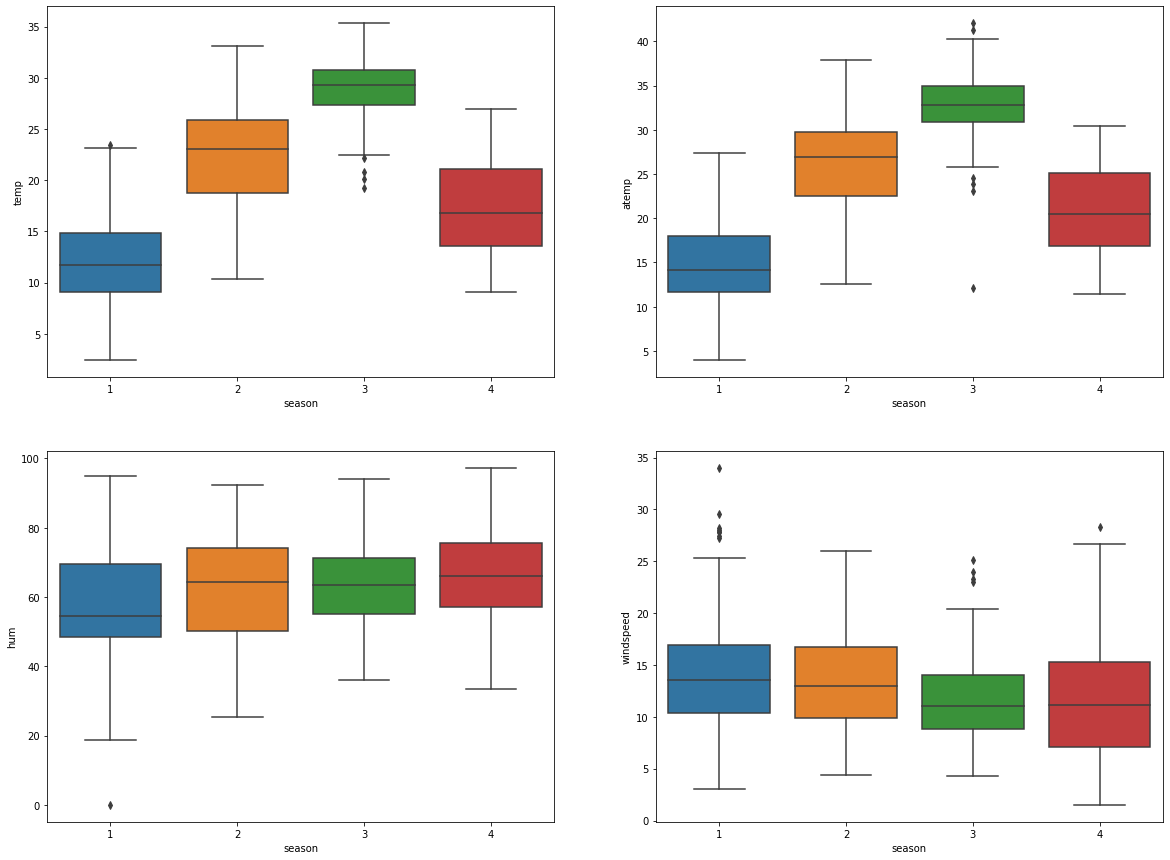

In [38]:
# associate seasons with weather
weather = [ 'temp', 'atemp', 'hum', 'windspeed']
fig,ax1 = plt.subplots(2,2,figsize = (20,15))
for i, number in enumerate(weather):
    sns.boxplot(x = 'season',y = number, ax=ax1[i//2, i%2],data=df)

Based on the graph above, we could makethe following observations:

* Temperature and felt temperature are highest during summer (2) and fall (3) and lowest in spring (1) and winter (4).

* Humidity levels remain fairly consistent across all seasons, but there's more variability in humidity during summer (2).

* Windspeed is relatively consistent across most seasons, with the lowest windspeed in fall (3). However, it's more variable during winter (4).

We could notice that spring(1) is colder than winter(4) and fall(3) is hotter than summer(2) in this dataset. Let us find out whether this is just a naming error or if it is true.

<AxesSubplot:xlabel='temp', ylabel='Count'>

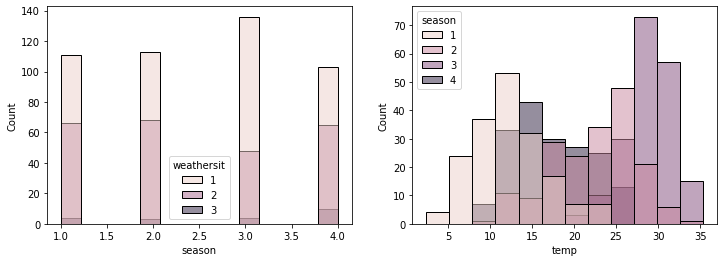

In [39]:
# graph for distribution of temperature and season
fig, ax =plt.subplots(1,2,figsize=(12, 4))
sns.histplot(x = 'season', data = df, hue = 'weathersit', ax = ax[0])
sns.histplot(x = 'temp',hue = 'season',data = df, ax = ax[1])

On the left graph, weather situation (weathersit) number 4 corresponds to snow and fog, and it's most prevalent during winter (4). On the right graph, the temperature distribution across seasons reveals that spring (1) consistently has lower temperatures compared to winter (4).

<AxesSubplot:xlabel='mnth', ylabel='count'>

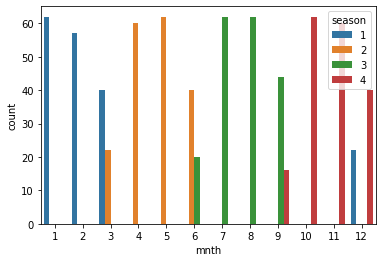

In [40]:
sns.countplot(x = 'mnth', hue = 'season', data = df)

The variation in temperature, with spring being colder than winter and fall being hotter during the summer, can be attributed to a mismatch in the categorization of seasons. In the United States, winter typically starts in late December and extends up to March. However, in this dataset, the majority of this period is categorized as spring (1). To address this discrepancy, we'll avoid referring to these categories as seasons and instead use quarters or specific months for more accurate representation.

# Thoughts:
In our data set, the most suitable time to operate a bike rental business based on their temperature and number of users are during the quarters 3,2,4,1 respectively. We will consider the weather during the third, second and fourth quarter in the same order due to its close relationship with bike rental users.

# Association with weather data set

Let us find out countries and cities that are suitable for bike rental all year round.

In [41]:
# temp and atemp of season 3,2,4
#focus on 25th - 75th percentile
tmp3 = df.groupby('season')['temp'].get_group(3)
tmp2 = df.groupby('season')['temp'].get_group(2)
tmp4 = df.groupby('season')['temp'].get_group(4)
print(f"the range of the median of the 3rd quarter and fourth quarter ({tmp3.median():.4f} - {tmp4.median():.4f}) degrees celcius")

the range of the median of the 3rd quarter and fourth quarter (29.2979 - 16.7758) degrees celcius


I excluded data from quarter '1' because it had a median temperature of only 11.7 degrees Celsius. This low temperature is likely too cold for bicycle rentals, and including it could have distorted our overall analysis. So, I decided to omit it from our dataset to ensure our analysis better represents the conditions relevant to the bicycle rental business.



The temperature suitable for bike rental business came from the median temperature of the third quarter(29.30 degrees) and the median temperature of the fourth quarter (16.78) which gives a temperature range of 16.78 - 29.30 degrees celcius. We would also filter out those countries that has less than the average GDP per capita and population.

In [42]:
#countries and cities that are under this temperature year round.
filt = (df_city['CityMedTemperature'] > 16.78) & (df_city['CityMedTemperature'] < 29.30) & (df_city['GDP_capita'] > df_city['GDP_capita'].mean()) & (df_city['population'] > df_city['population'].mean())
cities = df_city[filt].sort_values(['GDP_capita','population'],ascending = [False, False])
print(f"There are a total of {len(cities['Country'].unique())} Countries that has suitable weather for biking, has enough GDP per capita and population")
print(f"There are a total of {cities.shape[0]} cities that has suitable weather for biking, has enough GDP per capita and population")

There are a total of 3 Countries that has suitable weather for biking, has enough GDP per capita and population
There are a total of 16 cities that has suitable weather for biking, has enough GDP per capita and population


In [43]:
cities

,Country,City,CityMedTemperature,firstq_city,secondq_city,thirdq_city,fourthq_city,population,GDP_capita
451,US,Los Angeles,17.11248,14.05668,17.05692,20.27940,16.44576,12750807.0,56053.8
396,US,Houston,22.27956,14.77896,25.05756,28.22448,17.58474,5464251.0,56053.8
269,US,Atlanta,18.22368,9.50076,22.05732,25.61316,12.88992,5449398.0,56053.8
506,US,Phoenix,24.27972,15.83460,28.61340,34.28052,18.22368,4219697.0,56053.8
571,US,San Diego,17.44584,14.66784,17.50140,21.11280,16.77912,3220118.0,56053.8
277,US,Birmingham,18.89040,10.00080,22.55736,26.22432,13.05660,2897303.0,56053.8
431,US,Las Vegas,20.72388,12.11208,25.72428,32.66928,14.00112,2104198.0,56053.8
563,US,San Antonio,22.05732,14.52894,25.05756,28.72452,17.05692,2049293.0,56053.8
500,US,Orlando,23.44632,18.22368,24.89088,26.94660,20.89056,1822394.0,56053.8
272,US,Austin,21.55728,13.13994,24.72420,28.33560,16.14018,1687311.0,56053.8


Text(0.5, 1.0, 'Number of Cities per Country')

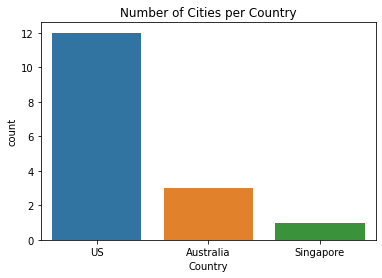

In [44]:
# count plot of number of cities in each country
df1 = pd.DataFrame(cities)
sns.countplot(x = 'Country', data = df1, order = df1['Country'].value_counts().index)
plt.title("Number of Cities per Country")

Text(0.5, 1.0, 'GDP per Capita of Qualified Countries')

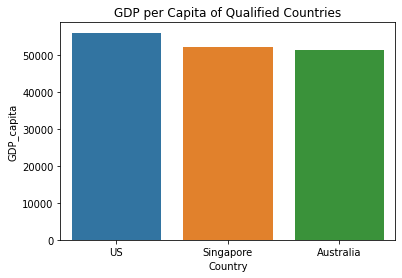

In [45]:
#graph gdp per capita of qualified countries
sns.barplot(x = 'Country', y = 'GDP_capita', data = df1)
plt.title("GDP per Capita of Qualified Countries")

There are only three suitable countries that passed the temperature,gdp, population test, those countries are  the USA,Singapore,and Australia. The mean population of each city is 1256180 people. USA has the most number of cities with 12, Australia has 3, and singapore has one.

<AxesSubplot:title={'center':'Suitable Cities for Biking Rental Business'}, xlabel='population', ylabel='City'>

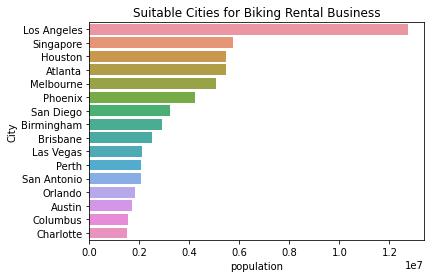

In [46]:
# order of most suitable cities for biking
plt.title("Suitable Cities for Biking Rental Business")
sns.barplot(y = 'City', x = 'population', data = df1.sort_values('population', ascending = False))

Based on this graph, opening our bike rental business in these 16 cities primarily lead by Los Angeles, Singapore, Houston, Atlanta, and Melbourne would provide the best chance of our business succeeding due to its economical landscape, number of people in the city and its weather.

# Findings
1. The popularity of using bikes as the people's main source of transportation is based on the weather of the country.
2. Based on our analyzation from the given data, countries such as the United States of America, Singapore, and Australia are the most suitable countries to build a bicycle rental business.


# Machine Learning

This section elevates the entire notebook as we transition to utilizing machine learning for the purpose of determining whether a particular location is suitable for establishing a bicycle rental business.

**Adding response variable**

Based on our analyzation from the previous section, the range of temperature that is suitable for bicycle rental business is 29.2979 - 16.7758 degrees celcius. Let us explore its variability within its distribution to have a better idea of the response variable.

(array([221., 438.,  71.]),
 array([-10.,  15.,  30.,  35.]),
 <BarContainer object of 3 artists>)

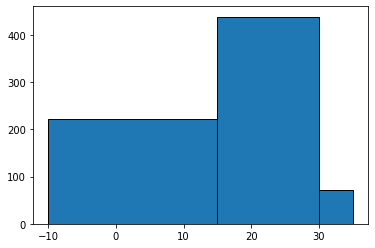

In [47]:
bin_edges = [ -10.0, 15.0, 30.0, 35.0]  # Adjust these values as needed

plt.hist(x = df['temp'], bins=bin_edges, edgecolor='k')

Based on the given range from the data exploration section, it appears that the data has an uneven distribution. To create more equally-sized bins, we can narrow the range by calculating the mean of the range and then determining values that are 20% below and 20% above the mean. This will result in a smaller, more balanced range for binning.

In [48]:
mean_value = (29.2979 + 16.7758) / 2
value_20_percent_below = mean_value - 0.2 * mean_value
value_20_percent_above = mean_value + 0.2 * mean_value
print(f"Above mean: {value_20_percent_below}, Below mean: {value_20_percent_above}")

Above mean: 18.42948, Below mean: 27.64422


Based on our computation, our new range in temperature ranges from 18.42948 - 27.64422.

(array([317., 237., 177.]),
 array([-10.     ,  18.42948,  27.     ,  50.     ]),
 <BarContainer object of 3 artists>)

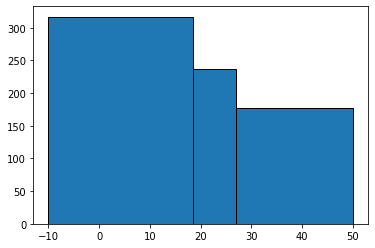

In [49]:
bin_edges = [ -10.0, 18.42948, 27, 50.0]  # Adjust these values as needed

plt.hist(x = df['temp'], bins=bin_edges, edgecolor='k')

Our objective in this step was to balance the distribution of bins to prevent an excessive concentration of 'success' (1) in our data. This balance facilitates a more effective evaluation of the model.

In [50]:
df_city['Suitable'] = np.where((df_city['CityMedTemperature'] >= 18.42948) & (df_city['CityMedTemperature'] <= 27), 1, 0)

My approach would be to train model using df and test it usinf city_df

update: I would just use city_df

In [51]:
df_city['Country'].where(df_city['Suitable'] == 1).value_counts(normalize=True).head(10)

US                    0.535714
Bermuda               0.077381
Costa Rica            0.059524
Dominican Republic    0.029762
Australia             0.017857
China                 0.017857
Egypt                 0.017857
Mexico                0.017857
Brazil                0.017857
Cyprus                0.011905
Name: Country, dtype: float64

In [52]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             676 non-null    object 
 1   City                676 non-null    object 
 2   CityMedTemperature  676 non-null    float64
 3   firstq_city         676 non-null    float64
 4   secondq_city        676 non-null    float64
 5   thirdq_city         676 non-null    float64
 6   fourthq_city        676 non-null    float64
 7   population          637 non-null    float64
 8   GDP_capita          643 non-null    object 
 9   Suitable            676 non-null    int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 52.9+ KB


In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [54]:
df_city['GDP_capita'] = df_city['GDP_capita'].astype(float)

In [55]:
numerical = ['CityMedTemperature', 'firstq_city', 'secondq_city', 'thirdq_city', 'fourthq_city',
             'population', 'GDP_capita']
categorical = ['Country', 'City']

In [56]:
X = df_city[numerical]
y = df_city['Suitable']

**Setting up Data Pipeline**

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

object_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot_encoder', OneHotEncoder(drop='first', sparse=False))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical),
      #  ('cat', object_transformer, categorical)
    ])
X_train_tr = preprocessor.fit_transform(X_train)
X_test_tr = preprocessor.fit_transform(X_test)

**Functions for Model Evaluation**

In [59]:
def calculate_metrics(y_test, y_pred_rf, X_test_tr, classifier):
    f1 = f1_score(y_test, y_pred_rf)
    y_prob = classifier.predict_proba(X_test_tr)[:, 1]
    auc_roc = roc_auc_score(y_test, y_prob)
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)

    # Print F1 score and AUC-ROC
    print("F1 Score:", f1)
    print(f"accuracy: {accuracy_score(y_test, y_pred_rf)}")
    print(f"precision: {precision_score(y_test, y_pred_rf)}")
    print(f"recall: {recall_score(y_test, y_pred_rf)}")
    print("AUC-ROC:", auc_roc)

def calculate_display_cm(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)

    # Display the confusion matrix
    print("Confusion Matrix:")
    print(cm)

    # Optionally, visualize the confusion matrix
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 16})
    plt.title("Confusion Matrix")
    plt.show()
    

**Benchmark for Accuracy Measure**

In [60]:
print(y_test.value_counts())
y_test.value_counts(normalize=True)

0    102
1     34
Name: Suitable, dtype: int64


0    0.75
1    0.25
Name: Suitable, dtype: float64

In the test set, the '1' outcomes make up 25% of the total results. This means that if we had a model that simply guessed '1' all the time, it would be correct 25% of the time. Our goal is to achieve an accuracy score higher than this baseline. Another reference point is a random model that makes predictions without considering any features.

**Random Estimator**

In [61]:
total_elements = 136
random_array = np.random.randint(2, size=total_elements)

Confusion Matrix:
[[61 41]
 [16 18]]


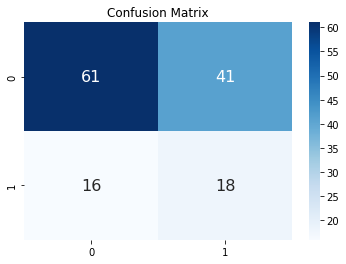

In [62]:
cm = calculate_display_cm(y_test, random_array)
cm

The random model model has achieved an accuracy score of 46%, which appears better than the 'predict all 1s' model but is still not satisfactory. Our objective is to achieve a significantly higher accuracy score than both of these baseline models.

**Logistic Regression**

In [63]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train_tr, y_train)

y_pred_log_reg = log_reg.predict(X_test_tr)

In [64]:
calculate_metrics(y_test, y_pred_log_reg, X_test_tr, log_reg)

F1 Score: 0.3666666666666667
accuracy: 0.7205882352941176
precision: 0.4230769230769231
recall: 0.3235294117647059
AUC-ROC: 0.8367935409457901


Confusion Matrix:
[[87 15]
 [23 11]]


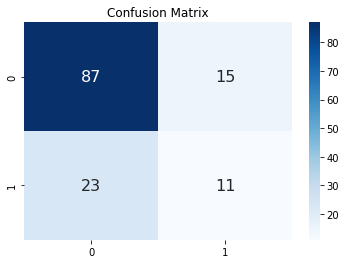

In [65]:
calculate_display_cm(y_test, y_pred_log_reg)

**Random Forest**

In [66]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=1, n_jobs=-1)
rnd_clf.fit(X_train_tr, y_train)

y_pred_rf = rnd_clf.predict(X_test_tr)

In [67]:
calculate_metrics(y_test, y_pred_rf, X_test_tr, rnd_clf)

F1 Score: 0.72
accuracy: 0.8455882352941176
precision: 0.6585365853658537
recall: 0.7941176470588235
AUC-ROC: 0.8284313725490196


Confusion Matrix:
[[88 14]
 [ 7 27]]


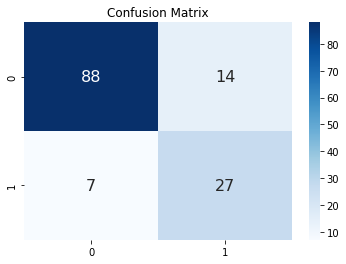

In [68]:
calculate_display_cm(y_test, y_pred_rf)

**Random Forest Grid Search**

In [69]:
rnd_clf = RandomForestClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [10, 50, 100],  # Number of trees in the forest
    'max_depth': [20, 30, 40],  # Maximum depth of the trees
    'min_samples_split': [5, 10, 15],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create a GridSearchCV object with the classifier and parameter grid
grid_search = GridSearchCV(estimator=rnd_clf, param_grid=param_grid, cv=10, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train_tr, y_train)

# Get the best hyperparameters and corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters and corresponding model
print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best Model: RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=50)


In [70]:
rnd_clf_grid = RandomForestClassifier(max_depth = 20, min_samples_split = 5,
                                      n_estimators = 100)
rnd_clf_grid.fit(X_train_tr, y_train) 

y_pred_rf_grid = rnd_clf_grid.predict(X_test_tr)

In [71]:
calculate_metrics(y_test, y_pred_rf_grid, X_test_tr, rnd_clf_grid)

F1 Score: 0.72
accuracy: 0.8455882352941176
precision: 0.6585365853658537
recall: 0.7941176470588235
AUC-ROC: 0.939878892733564


Confusion Matrix:
[[88 14]
 [ 7 27]]


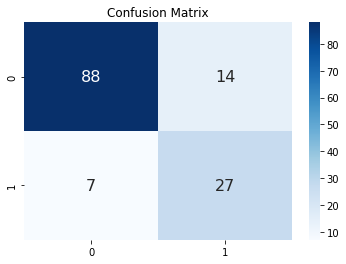

In [72]:
calculate_display_cm(y_test, y_pred_rf_grid)